# DCASE Challenge Task 4
In this notebook, I will attempt to get a better understanding of the annotations of the dataset provided for this task. There are two groups of annotations I will be looking at:
- Strongly Labelled Groundtruths
- Weakly Labelled Groundtruths

For each of these groups, the entries have been split into train and test sets. So we will look at the distributions of these as well.  

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### Number of Files Per Class

In [26]:
dtrain = pd.read_csv('Task4/training_set_num_files_per_class.csv',names=['Class','Number'])
dtest  = pd.read_csv('Task4/testing_set_num_files_per_class.csv', names=['Class','Number'])

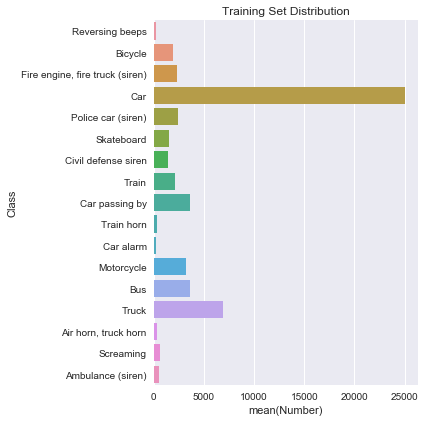

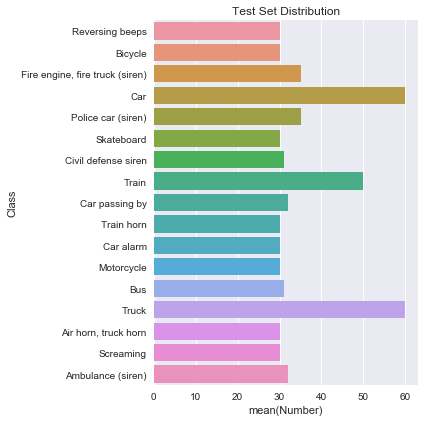

In [28]:
# Training Set Distribution
plt.figure(figsize=(6,6))
sns.barplot(x="Number",y="Class",data=dtrain)
plt.title("Training Set Distribution")
plt.tight_layout()

# Test Set Distribution
plt.figure(figsize=(6,6))
sns.barplot(x="Number",y="Class",data=dtest)
plt.title("Test Set Distribution")
plt.tight_layout()

## Actual Training & Testing Data

In [74]:
colnames = ['YouTubeID','Onset','Offset','Labels','Classes']
dtrain  = pd.read_csv('Task4/training_set.csv',sep=',',names=colnames)
dtest   = pd.read_csv('Task4/testing_set.csv',sep=',', names=colnames)

print dtrain.head(5)
print "\n"
print "Training Examples: %d"%(dtrain.shape[0])
print "Testing Examples:  %d"%(dtest.shape[0])

     YouTubeID  Onset  Offset            Labels              Classes
0  2ceUOv8A3FE   20.0    30.0  Train horn,Train  /m/0284vy3,/m/07jdr
1  2hcY8kXQj60   30.0    40.0  Train horn,Train  /m/0284vy3,/m/07jdr
2  2pt7WZBYeeI   30.0    40.0  Train horn,Train  /m/0284vy3,/m/07jdr
3  2wG6EBWr5NQ   30.0    40.0        Train horn           /m/0284vy3
4  2wadsgHvSAM  240.0   250.0  Train horn,Train  /m/0284vy3,/m/07jdr


Training Examples: 51172
Testing Examples:  488


In [76]:
## Other Statistics
print "Unique YouTube videos:     %d"%(dtrain.YouTubeID.unique().shape[0])
print "Unique Label combinations: %d"%(dtrain.Classes.unique().shape[0])

Unique YouTube videos:     51172
Unique Label combinations: 128


In [79]:
# dtrain(by=dtrain['Classes'])

## Weak vs Strong Labels

In [57]:
colnames = ['Wavfile','Onset','Offset','Labels']
dwtrain  = pd.read_csv('Task4/groundtruth_weak_label_training_set.csv',sep='\t',names=colnames)
dwtest   = pd.read_csv('Task4/groundtruth_weak_label_testing_set.csv',sep='\t', names=colnames)
dstest   = pd.read_csv('Task4/groundtruth_strong_label_testing_set.csv',sep='\t', names=colnames)

print 'Weak Training Data'
print dwtrain.head(5)
print '\n\n'
print 'Weak Testing Data'
print dwtest.head(5)
print '\n\n'
print 'Strong Testing Data'
print dstest.head(5)

Weak Training Data
                           Wavfile  Onset  Offset      Labels
0    2ceUOv8A3FE_20.000_30.000.wav   20.0    30.0  Train horn
1    2hcY8kXQj60_30.000_40.000.wav   30.0    40.0  Train horn
2    2pt7WZBYeeI_30.000_40.000.wav   30.0    40.0  Train horn
3    2wG6EBWr5NQ_30.000_40.000.wav   30.0    40.0  Train horn
4  2wadsgHvSAM_240.000_250.000.wav  240.0   250.0  Train horn



Weak Testing Data
                         Wavfile  Onset  Offset      Labels
0  -5QrBL6MzLg_60.000_70.000.wav   60.0    70.0  Train horn
1  -E0shPRxAbo_30.000_40.000.wav   30.0    40.0  Train horn
2   -GCwoyCnYsY_0.000_10.000.wav    0.0    10.0  Train horn
3  -Gbohom8C4Q_30.000_40.000.wav   30.0    40.0  Train horn
4  -Qfk_Q2ctBs_30.000_40.000.wav   30.0    40.0  Train horn



Strong Testing Data
                         Wavfile  Onset  Offset      Labels
0  -5QrBL6MzLg_60.000_70.000.wav  0.917   2.029  Train horn
1  -E0shPRxAbo_30.000_40.000.wav  2.705   8.895  Train horn
2   -GCwoyCnYsY_0.000_10.

### Further Description of Weak Labels
A few things to note about the weak labels
- Every entry has a unique class
- Some classes have a two part label, separated by a comma:
    - For instance 'Air horn, truck horn' refers to one class
- There are **17 Classes** in all

In [55]:
print 'The 17 unique classes are:'
for label in dwtest.Labels.unique():
    print '\x1b[31m'+ label+ '\x1b[0m'

The 17 unique classes are:
Train horn
Air horn, truck horn
Car alarm
Reversing beeps
Bicycle
Skateboard
Ambulance (siren)
Fire engine, fire truck (siren)
Civil defense siren
Police car (siren)
Screaming
Car
Car passing by
Bus
Truck
Motorcycle
Train


## Co-Occurence
Now, let's investigate the co-occurence of these labels. This is to answer the question:
>Which ones often occur together?

All these analysis will be performed on the training set. 

In [62]:
# Unique Audio Session / Youtube Clips
len(dwtrain.Wavfile.unique())

51172

In [63]:
len(dwtrain.Wavfile)

56131